# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import pandas as pd

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [3]:
ID = 2087644
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data/fashion")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [47 38 46 59 45 48 55 47 56 59]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


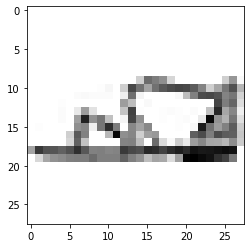

LABEL: 5
INPUT:


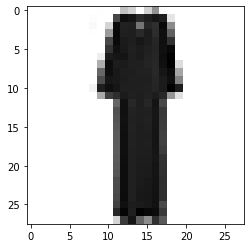

LABEL: 3
INPUT:


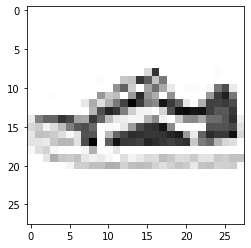

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv = MLPClassifier(hl_parameters,  max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID)
mlp_cv_grid_search = GridSearchCV(mlp_cv,hl_parameters,cv=5)
mlp_cv_grid_search.fit(X_train, y_train)

Iteration 1, loss = 2.35389040
Iteration 2, loss = 2.14775281
Iteration 3, loss = 1.82404376
Iteration 4, loss = 1.54062801
Iteration 5, loss = 1.50062430
Iteration 6, loss = 1.60214938
Iteration 7, loss = 1.08944343
Iteration 8, loss = 0.93749268
Iteration 9, loss = 0.85121157
Iteration 10, loss = 0.76302162
Iteration 11, loss = 0.75121527
Iteration 12, loss = 0.82298724
Iteration 13, loss = 0.69073257
Iteration 14, loss = 0.69742380
Iteration 15, loss = 0.64375795
Iteration 16, loss = 0.71761188
Iteration 17, loss = 0.65077671
Iteration 18, loss = 0.53392326
Iteration 19, loss = 0.52249338
Iteration 20, loss = 0.48561807
Iteration 21, loss = 0.47264193
Iteration 22, loss = 0.45313358
Iteration 23, loss = 0.45406099
Iteration 24, loss = 0.41751248
Iteration 25, loss = 0.43812799
Iteration 26, loss = 0.45999909
Iteration 27, loss = 0.39471665
Iteration 28, loss = 0.34634578
Iteration 29, loss = 0.39209104
Iteration 30, loss = 0.47173091
Iteration 31, loss = 0.35901033
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes={'hidden_layer_sizes': [(10,),
                                                                                (50,),
                                                                                (10,
                                                                                 10),
                                                                                (50,
                                                                                 50)]},
                                     learning_rate_init=0.1, max_iter=300,
                                     random_state=2087644, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:", mlp_cv_grid_search.best_estimator_)

print("Score with best parameters:", mlp_cv_grid_search.best_score_)

print("\nAll scores on the grid:")
display(pd.DataFrame(mlp_cv_grid_search.cv_results_))

RESULTS FOR NN

Best parameters set found: MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=300,
              random_state=2087644, solver='sgd', verbose=True)
Score with best parameters: 0.7619999999999999

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.591683,0.202332,0.001588,0.000252,"(10,)","{'hidden_layer_sizes': (10,)}",0.69,0.71,0.75,0.68,0.73,0.712,0.025612,3
1,1.203766,0.084178,0.002170,0.000377,"(50,)","{'hidden_layer_sizes': (50,)}",0.71,0.80,0.79,0.73,0.78,0.762,0.035440,1
2,0.220796,0.052085,0.001510,0.000129,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.36,0.12,0.66,0.44,0.09,0.334,0.211433,4
3,0.763293,0.243861,0.002009,0.000387,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.72,0.82,0.72,0.73,0.77,0.752,0.038678,2


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

### Answer
We can see that the best architecture is the one with only one hidden layer with 50 nodes in it. This means that more neurons and hidden layers doesn't necessarily means better performances.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [10]:
#get training and test error for the best NN model from CV

mlp = mlp_cv_grid_search.best_estimator_
mlp.fit(X_train, y_train)

training_error = 1. - mlp.score(X_train, y_train)

test_error = 1. - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.14725787
Iteration 2, loss = 1.38352020
Iteration 3, loss = 1.25401327
Iteration 4, loss = 1.06748551
Iteration 5, loss = 0.78019599
Iteration 6, loss = 0.68310685
Iteration 7, loss = 0.69788990
Iteration 8, loss = 0.59729517
Iteration 9, loss = 0.52082414
Iteration 10, loss = 0.46212304
Iteration 11, loss = 0.43698883
Iteration 12, loss = 0.45105112
Iteration 13, loss = 0.37688346
Iteration 14, loss = 0.40383397
Iteration 15, loss = 0.34997519
Iteration 16, loss = 0.33096622
Iteration 17, loss = 0.41678585
Iteration 18, loss = 0.35112275
Iteration 19, loss = 0.48227482
Iteration 20, loss = 0.29999655
Iteration 21, loss = 0.28135397
Iteration 22, loss = 0.23335843
Iteration 23, loss = 0.24735696
Iteration 24, loss = 0.21740871
Iteration 25, loss = 0.29044478
Iteration 26, loss = 0.41615069
Iteration 27, loss = 0.32360431
Iteration 28, loss = 0.22536191
Iteration 29, loss = 0.16943497
Iteration 30, loss = 0.14669367
Iteration 31, loss = 0.17455144
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [11]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1053,  999,  951, 1009, 1013, 1009,  988,  969, 1000, 1009]))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [12]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = MLPClassifier(hl_parameters,  max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=False, random_state=ID)

mlp_large_cv_grid_search = GridSearchCV(mlp_large_cv,hl_parameters,cv=5)
mlp_large_cv_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes={'hidden_layer_sizes': [(10,),
                                                                                (50,),
                                                                                (10,
                                                                                 10),
                                                                                (50,
                                                                                 50)]},
                                     learning_rate_init=0.1, max_iter=300,
                                     random_state=2087644, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [13]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:", mlp_large_cv_grid_search.best_estimator_)

print("Score with best parameters:", mlp_large_cv_grid_search.best_score_)

print("\nAll scores on the grid:")
display(pd.DataFrame(mlp_large_cv_grid_search.cv_results_))

RESULTS FOR NN

Best parameters set found: MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=300,
              random_state=2087644, solver='sgd')
Score with best parameters: 0.8521000000000001

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.140914,1.244535,0.003853,0.000374,"(10,)","{'hidden_layer_sizes': (10,)}",0.7200,0.7735,0.7995,0.813,0.8085,0.7829,0.034298,3
1,10.707085,3.148409,0.006713,0.000334,"(50,)","{'hidden_layer_sizes': (50,)}",0.8360,0.8570,0.8445,0.861,0.8620,0.8521,0.010180,1
2,4.954363,0.823820,0.004042,0.001011,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.7865,0.7430,0.7925,0.796,0.6650,0.7566,0.049620,4
3,9.875051,2.833581,0.007898,0.000788,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.8425,0.8520,0.8355,0.841,0.8685,0.8479,0.011591,2


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

### Answer
The best architecture is the same as before (1 hidden layer with 50 nodes), but we can see that all scores are better, as we could expect since we gave the model more data to work with

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [14]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv_grid_search.best_estimator_
best_mlp_large.fit(X_train, y_train)

training_error_large = 1. - best_mlp_large.score(X_train, y_train)

test_error_large = 1. - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.220706


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

In [15]:
from tabulate import tabulate
table = [["Training error", training_error, training_error_large], ["Test error", test_error, test_error_large]]
print(tabulate(table,headers=["500 points","10000 points"],numalign="right"))

                  500 points    10000 points
--------------  ------------  --------------
Training error             0          0.0032
Test error          0.220706         0.14692


### Answer
As we discussed previously, the best architecture remains the same if we increase data points, but with more data it performs much better in the test enviroment, even if the training error differs from zero. 

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

Missclassified points by linear regression but correctly classified by SVM:  6372
INPUT:


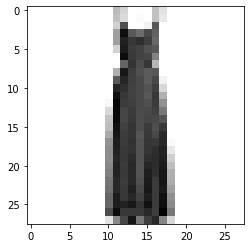

LABEL: 3


In [16]:
y_test_np = np.asarray(y_test)
misclassified_500 = np.where(y_test_np != mlp.predict(X_test))
classified_10000 = np.where(y_test_np == best_mlp_large.predict(X_test))
print("Missclassified points by linear regression but correctly classified by SVM: ", len(np.intersect1d(misclassified_500, classified_10000)))
plot_input(X_train,y_train,np.intersect1d(misclassified_500, classified_10000)[0])

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


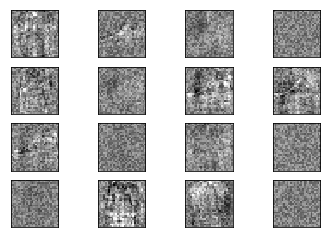

Weights with 10000 data points:


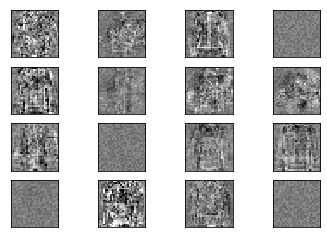

In [17]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

### Answer
In both set of weights we can see some shape of the clothes, but in the set with 10000 data points they are much more frequent. In general, we can see that there is much less noise in the weights with 10000 data points

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

In [18]:
from sklearn.svm import SVC
from sklearn.kernel_approximation import RBFSampler

parameters = {'C': [1, 10],'gamma':[0.01,0.1]}

rbf_SVM = SVC(kernel='rbf')
clf_rbf = GridSearchCV(estimator=rbf_SVM, param_grid=parameters, cv=5,n_jobs=-1)
clf_rbf.fit(X_train,y_train)

training_error_other = 1. - clf_rbf.score(X_train, y_train)

test_error_other = 1. - clf_rbf.score(X_test, y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.016200
Best test error (other model): 0.121320


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

In [22]:
table = [["Training error", training_error_large, training_error_other], ["Test error", test_error_large, test_error_other]]
print(tabulate(table,headers=["NN","SVM"],numalign="right"))

                     NN      SVM
--------------  -------  -------
Training error   0.0032   0.0162
Test error      0.14692  0.12132


### Answer
The test error of the SVM is lower, but the training time was significantly higher than the NN. I would choose the NN simply because the tradeoff between much higher and relatively small improvement in the test error is not worth

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [23]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [24]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [25]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)
kmeans.fit(X_train, y_train)

KMeans(n_clusters=10, random_state=2087644)

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [46]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
from sklearn.metrics.cluster import contingency_matrix

cont_mat = contingency_matrix(y_train, kmeans.predict(X_train))
print(cont_mat)

[[  0   8   0  53   7   1   0   1   0 118]
 [  0   0   0  13 167   0   0   2   0   9]
 [  1  50   0  68   0   0   0  97   0   5]
 [  0   1   0  47 101   0   0   3   0  65]
 [  1  22   0  20   5   0   0 107   0  35]
 [  1   0  29  13   0 125   1   0   8   1]
 [  0  20   0  74   2   1   2  57   0  45]
 [  0   0  47   0   0 145   0   0   0   0]
 [ 95  18   5  22   1   7  76   1   1   2]
 [  0   0  77   2   0   4   0   0 111   0]]


## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

### Answer 
As we can see from the matrix, Kmeans predicts the cluster in a decent way, with the only conflict at column 3 and 9.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [47]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID)
    kmeans.fit(X_train, y_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.predict(X_train))
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.18950117666777605
Silhoutte coefficient for number of clusters=3: 0.17849395154236197
Silhoutte coefficient for number of clusters=4: 0.1738946541835875
Silhoutte coefficient for number of clusters=5: 0.15706785899266443
Silhoutte coefficient for number of clusters=6: 0.15371640346119594
Silhoutte coefficient for number of clusters=7: 0.15974337033687158
Silhoutte coefficient for number of clusters=8: 0.16943558806425602
Silhoutte coefficient for number of clusters=9: 0.15594975058273328
Silhoutte coefficient for number of clusters=10: 0.15146414948644354
Silhoutte coefficient for number of clusters=11: 0.142748146019992
Silhoutte coefficient for number of clusters=12: 0.1408076074570716
Silhoutte coefficient for number of clusters=13: 0.13502528977230174
Silhoutte coefficient for number of clusters=14: 0.12916842535164544
Silhoutte coefficient for number of clusters=15: 0.1253545664519609


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

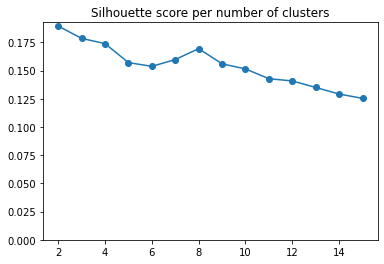

In [48]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

### Answer
We know that the dataset has 10 classes, but the highest silhoutte score is given by choosing 2 clusters. This may be given by the fact that the algorithm is not capable of splitting between, for example, shirt and t-shirt, but rather splits the data between shoes and clothes. 
<br>
Notable is the fact that in 8 clusters there's a slight increase in the score.